##### Python [conda env:DataScience]

<div style="padding:15px; color:white; margin:0px; font-size:200%; text-align:left; display:fill;
            border-radius:5px; background-color:#0000cd; overflow:hidden; font-weight:bold">
    From Modeling to Data Evaluation.
</div>

**Dataset Description**:
- The data was compiled by a researcher named Yong-Yeol Ahn, who extracted tens of thousands of food recipes (cuisines and ingredients) from three different websites, namely:
    - www.allrecipes.com
    - www.epicurious.com
    - www.menupan.com
- All the collected data was grouped into: ***recipes.csv***
- Our dataset consists of various recipes and their respective ingredients.
- Each row represents a recipe, and for each recipe, the corresponding geographic area and whether or not the ingredients exist in the recipe are documented, starting with **almonds** and ending with **zucchini**.
- We want to determine which ingredients are most commonly used in each geographic area.
- For this reason, the name of each recipe was removed, leaving only the geographic area and ingredients.

### Required packages and libraries:

In [1]:
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import itertools

from graphviz import Source
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz

%matplotlib inline

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

print('All packages imported!')

All packages imported!


In [2]:
recipes = pd.read_csv("recipes.csv")
print("Data readed to DataFrame = 'recipes'!")

Data readed to DataFrame = 'recipes'!


We will repeat the preprocessing steps we implemented in the section: **Data Analysis**
- **From understanding to preparation** to prepare the data for modeling.

In [3]:
# We fixed the name of the column that shows the cooks
columns_names = recipes.columns.values
columns_names[0] = "cooks"
recipes.columns = columns_names

# We changed all the names in the 'Cooks' column to start with capital letters.
recipes["cooks"] = recipes["cooks"].str.capitalize()

# make the cuisine names consistent
recipes.loc[recipes["cooks"] == "American", "cooks"] = "North-america"
recipes.loc[recipes["cooks"] == "Austria", "cooks"] = "Austrian"
recipes.loc[recipes["cooks"] == "Belgium", "cooks"] = "Belgian"
recipes.loc[recipes["cooks"] == "China", "cooks"] = "Chinese"
recipes.loc[recipes["cooks"] == "Canada", "cooks"] = "North-america"
recipes.loc[recipes["cooks"] == "Netherlands", "cooks"] = "Dutch"
recipes.loc[recipes["cooks"] == "France", "cooks"] = "French"
recipes.loc[recipes["cooks"] == "Germany", "cooks"] = "German"
recipes.loc[recipes["cooks"] == "India", "cooks"] = "Indian"
recipes.loc[recipes["cooks"] == "Indonesia", "cooks"] = "Indonesian"
recipes.loc[recipes["cooks"] == "Iran", "cooks"] = "Iranian"
recipes.loc[recipes["cooks"] == "Italy", "cooks"] = "Italian"
recipes.loc[recipes["cooks"] == "Japan", "cooks"] = "Japanese"
recipes.loc[recipes["cooks"] == "Israel", "cooks"] = "Israeli"
recipes.loc[recipes["cooks"] == "Korea", "cooks"] = "Korean"
recipes.loc[recipes["cooks"] == "Lebanon", "cooks"] = "Lebanese"
recipes.loc[recipes["cooks"] == "Malaysia", "cooks"] = "Malaysian"
recipes.loc[recipes["cooks"] == "Mexico", "cooks"] = "Mexican"
recipes.loc[recipes["cooks"] == "Pakistan", "cooks"] = "Pakistani"
recipes.loc[recipes["cooks"] == "Philippines", "cooks"] = "Philippine"
recipes.loc[recipes["cooks"] == "Scandinavia", "cooks"] = "Scandinavian"
recipes.loc[recipes["cooks"] == "Spain", "cooks"] = "Spanish_portuguese"
recipes.loc[recipes["cooks"] == "Portugal", "cooks"] = "Spanish_portuguese"
recipes.loc[recipes["cooks"] == "Switzerland", "cooks"] = "Swiss"
recipes.loc[recipes["cooks"] == "Thailand", "cooks"] = "Thai"
recipes.loc[recipes["cooks"] == "Turkey", "cooks"] = "Turkish"
recipes.loc[recipes["cooks"] == "Vietnam", "cooks"] = "Vietnamese"
recipes.loc[recipes["cooks"] == "Uk-and-ireland", "cooks"] = "Uk-and-irish"
recipes.loc[recipes["cooks"] == "Irish", "cooks"] = "Uk-and-irish"

# We removed cooks with <50 recipes.
recipes_count = recipes["cooks"].value_counts()
cooks_index = recipes_count > 50

cooks_to_keep = list(np.array(recipes_count.index.values)[np.array(cooks_index)])
recipes = recipes.loc[recipes['cooks'].isin(cooks_to_keep)] # Filter only the 'True' values ​​with (.loc)

# We encode all Yes in 1 and No in 0
recipes = recipes.replace(to_replace = "Yes", value = 1)
recipes = recipes.replace(to_replace = "No", value = 0)

<hr>


<div style="padding:10px; color:white; margin:0px; font-size:180%; text-align:left; display:fill;
            border-radius:5px; background-color:#ffa500; overflow:hidden; font-weight:bold">
    Data Modeling:
</div>

### Let's check the data again:

In [4]:
recipes.head()

cooks  almond  angelica  anise  anise_seed  apple  apple_brandy  \
0  Vietnamese       0         0      0           0      0             0   
1  Vietnamese       0         0      0           0      0             0   
2  Vietnamese       0         0      0           0      0             0   
3  Vietnamese       0         0      0           0      0             0   
4  Vietnamese       0         0      0           0      0             0   

   apricot  armagnac  artemisia  artichoke  asparagus  avocado  bacon  \
0        0         0          0          0          0        0      0   
1        0         0          0          0          0        0      0   
2        0         0          0          0          0        0      0   
3        0         0          0          0          0        0      0   
4        0         0          0          0          0        0      0   

   baked_potato  balm  banana  barley  bartlett_pear  basil  bay  bean  beech  \
0             0     0       0       0              0      1    0     0      0   
1             0     0       0       0              0      0    0     0      0   
2             0     0       0       0              0      0    0     0      0   
3             0     0       0       0              0      1    0     1      0   
4             0     0       0       0              0      0    0     0      0   

   beef  beef_broth  beef_liver  beer  beet  bell_pepper  bergamot  berry  \
0     0           0           0     0     0            0         0      0   
1     0           0           0     0     0            0         0      0   
2     0           0           0     0     0            0         0      0   
3     0           1           0     0     0            0         0      0   
4     0           0           0     0     0            0         0      0   

   bitter_orange  black_bean  black_currant  black_mustard_seed_oil  \
0              0           0              0                       0   
1              0           0              0                       0   
2              0           0              0                       0   
3              0           0              0                       0   
4              0           0              0                       0   

   black_pepper  black_raspberry  black_sesame_seed  black_tea  blackberry  \
0             0                0                  0          0           0   
1             1                0                  0          0           0   
2             0                0                  0          0           0   
3             0                0                  0          0           0   
4             0                0                  0          0           0   

   blackberry_brandy  blue_cheese  blueberry  bone_oil  bourbon_whiskey  \
0                  0            0          0         0                0   
1                  0            0          0         0                0   
2                  0            0          0         0                0   
3                  0            0          0         0                0   
4                  0            0          0         0                0   

   brandy  brassica  bread  broccoli  brown_rice  brussels_sprout  buckwheat  \
0       0         0      0         0           0                0          0   
1       0         0      0         0           0                0          0   
2       0         0      0         0           0                0          0   
3       0         0      0         0           0                0          0   
4       0         0      0         0           0                0          0   

   butter  buttermilk  cabbage  cabernet_sauvignon_wine  cacao  \
0       0           0        0                        0      0   
1       0           0        0                        0      0   
2       0           0        0                        0      0   
3       0           0        0                        0      0   
4       0 

## \[tea_tree] Asian and Indian Cuisine Only

Here, we are creating a decision tree for recipes from some of the Asian (Korean, Japanese, Chinese, Thai) and Indian cuisines. The reason for this is that the decision tree does not work well when the data is skewed towards one cuisine, in this case, North-American cuisine.
One option is to exclude North-American cuisine from our analysis or simply create decision trees for different subsets of data.
We will go with the latter solution.

**We will use the name 'tea' as tea is emblematic of hospitality and social culture in both contexts.**

We will build our decision tree using the data related to Asian and Indian cuisines and let's call our decision tree ***tea_tree***.

In [5]:
# I select a cooks subset
asian_indi_recipes = recipes[recipes.cooks.isin(["Korean", "Japanese", "Chinese", "Thai", "Indian"])]
cooks = asian_indi_recipes["cooks"]
ingredients = asian_indi_recipes.iloc[:,1:]

tea_tree = tree.DecisionTreeClassifier(max_depth=3)
tea_tree.fit(ingredients, cooks)

print("Decision tree model saved in tea_tree!")

Decision tree model saved in tea_tree!


- Let's graph the decision tree and see what it looks like.

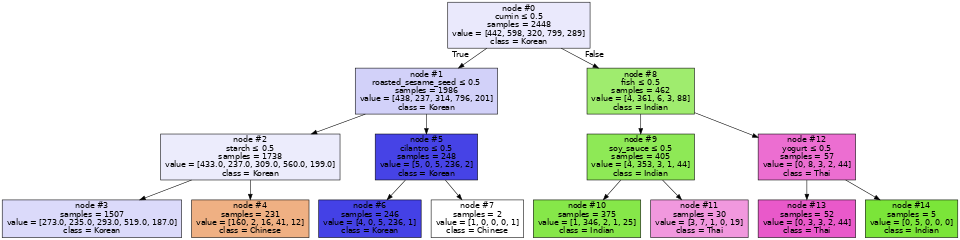

In [6]:
# Genero el archivo .dot
export_graphviz(tea_tree,
                feature_names=list(ingredients.columns.values),
                out_file="tea_tree.dot",
                class_names=np.unique(cooks),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

# Read .dot file
with open("tea_tree.dot") as tea_tree_image:
    tea_tree_graph = tea_tree_image.read()

# Adjust the size of the graph
tea_tree_graph = tea_tree_graph.replace('digraph Tree {', 'digraph Tree {\nsize="10,10";')

# Save the graph as PNG
dot = Source(tea_tree_graph)
dot.render('tea_tree', format='png')

# Image Show
Image(filename='tea_tree.png')

The decision tree learned:

* If a recipe contains *cumin* and *fish* and **not** *yogurt*, it is most likely a **Thai** recipe.
* If a recipe contains *cumin* and **not** *fish* and **not** *soy_sauce*, it is most likely an **Indian** recipe.
* If a recipe contains *cumin* and *roasted sesame seed* and *starch*, it is most likely a **Korean** recipe and **not** a **Chinese** recipe.

<div style="padding:10px; color:white; margin:0px; font-size:180%; text-align:left; display:fill;
            border-radius:5px; background-color:#ffa500; overflow:hidden; font-weight:bold">
    Model Evaluation:
</div>

To evaluate our model for Asian and Indian cuisines, we will split our dataset into a training set and a test set. We will build the decision tree using the training set. Then, we will test the model on the test set and compare the cuisines that the model predicts with real-world cuisines.

- Let's first create a new data frame using only the data belonging to Asian and Indian cuisines, and let's call the new data frame **tea_dataframe**.

In [7]:
tea_dataframe = recipes[recipes.cooks.isin(["Korean", "Japanese", "Chinese", "Thai", "Indian"])]

- Recipes that exist for every cuisine.

In [8]:
tea_dataframe["cooks"].value_counts()

cooks
Korean      799
Indian      598
Chinese     442
Japanese    320
Thai        289
Name: count, dtype: int64

- Remove 30 recipes from each cuisine to use as a test set and call this test set **tea_test**.

In [9]:
# Set the sample size
sample_size = 30

- Create a data frame containing 30 recipes from each cuisine, selected at random.

In [10]:
# Take 30 recipes from each cook

# Set the seed for reproducibility across all sources of randomness
seed = 1234
random.seed(seed)
np.random.seed(seed)

tea_test = tea_dataframe.groupby("cooks", group_keys=False).apply(lambda x: x.sample(sample_size, random_state = seed))

tea_test_ingredients = tea_test.iloc[:,1:] # ingredients (all columns except the first)
tea_test_cooks = tea_test["cooks"] # cooks or corresponding labels

- See that there are 30 recipes for each cook.

In [11]:
# Check that I have 30 recipes from each cook.
tea_test["cooks"].value_counts()

cooks
Chinese     30
Indian      30
Japanese    30
Korean      30
Thai        30
Name: count, dtype: int64

- Create the training set by removing the test set from the **tea_dataframe** dataset and call the training set **tea_train**.

In [12]:
tea_test_index = tea_dataframe.index.isin(tea_test.index)
tea_train = tea_dataframe[~tea_test_index]

tea_train_ingredients = tea_train.iloc[:,1:] # ingredients
tea_train_cooks = tea_train["cooks"] # cooks or corresponding labels

- I notice that there are now 30 *fewer* recipes for each cook.

In [13]:
tea_train["cooks"].value_counts()

cooks
Korean      769
Indian      568
Chinese     412
Japanese    290
Thai        259
Name: count, dtype: int64

- Build and fit the decision tree using the training set, **tea_train**, and name the generated tree **tea_train_tree** for prediction. (With reproducibility).

In [14]:
tea_tree_train = tree.DecisionTreeClassifier(max_depth=15, random_state = seed) # Tree depth 15 Nodes
tea_tree_train.fit(tea_train_ingredients, tea_train_cooks)

print("Decision tree model saved in tea_tree_train!")

Decision tree model saved in tea_tree_train!


- Draw the decision tree and check.

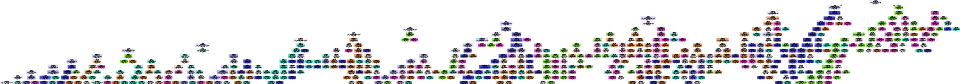

In [15]:
# Genero el archivo .dot
export_graphviz(tea_tree_train,
                feature_names=list(tea_train_ingredients.columns.values),
                out_file="tea_tree_train.dot",
                class_names=np.unique(tea_train_cooks),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

# Read .dot file
with open("tea_tree_train.dot") as tea_tree_train_image:
    tea_tree_train_graph = tea_tree_train_image.read()

# Adjust the size of the graph
tea_tree_train_graph = tea_tree_train_graph.replace('digraph Tree {', 'digraph Tree {\nsize="10,10";')

# Save as PNG
dot = Source(tea_tree_train_graph)
dot.render('tea_tree_train', format='png')

# Image Show
Image(filename='tea_tree_train.png')

- By defining our tree to be deeper, more decision nodes are generated.

#### Now I test the model with the test data.

In [16]:
prediction_cooks = tea_tree_train.predict(tea_test_ingredients)

- To quantify how well the decision tree is able to correctly determine the cook of each recipe, we will create a confusion matrix that presents a nice summary of how many recipes from each cook are correctly classified.
- It also sheds some light on which cooks are confused with other cooks.

- Create the confusion matrix to see how well the decision tree can correctly classify the recipes in **tea_test**.

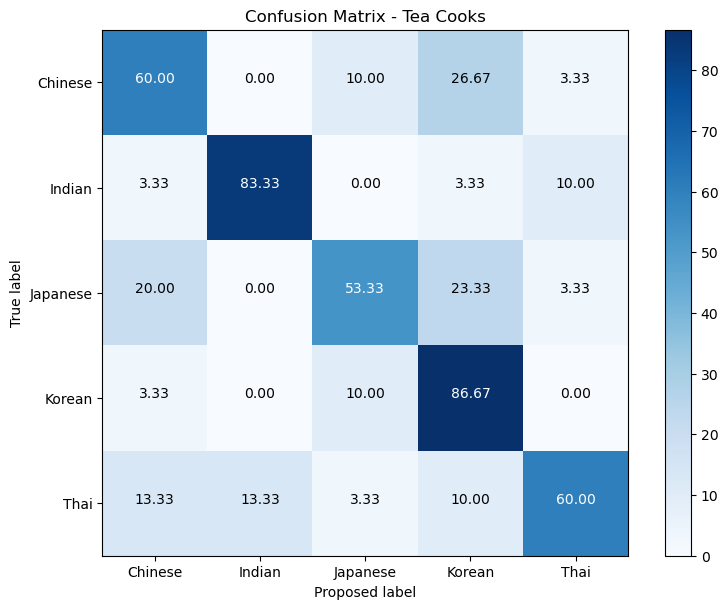

In [17]:
cooks_test = np.unique(tea_test_cooks)
tea_confusion_matrix = confusion_matrix(tea_test_cooks, prediction_cooks, labels = cooks_test)
title = 'Confusion Matrix - Tea Cooks'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
tea_confusion_matrix = (
    tea_confusion_matrix.astype('float') / tea_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(tea_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
check_marks = np.arange(len(cooks_test))
plt.xticks(check_marks, cooks_test)
plt.yticks(check_marks, cooks_test)

fmt = '.2f'
limit = tea_confusion_matrix.max() / 2.
for i, j in itertools.product(range(tea_confusion_matrix.shape[0]), range(tea_confusion_matrix.shape[1])):
    plt.text(j, i, format(tea_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if tea_confusion_matrix[i, j] > limit else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Proposed label')

plt.show()

The rows represent the actual cooks in the dataset and the columns represent the predicted ones. Each row should sum to 100%. Based on this confusion matrix, we make the following observations:

* Using the first row of the confusion matrix, 60% of the **Chinese** recipes in **tea_test** were correctly classified by our decision tree, while 26.67% of the recipes were misclassified as **Korean**, 10% were misclassified as **Japanese**, and 3.33% were misclassified as **Thai**.

* Using the **Korean** row, 86.67% of the **Korean** recipes were correctly classified by our decision tree, while 10% were incorrectly classified as **Japanese** and 3.33% were misclassified as **Chinese**.

<hr>

## Changelog

| Date (DD/MM/YYYY) | Version | Description of change |
| ------------------ | ------- | ---------------------------------- |
| 15/05/2023 | 1.0 | Notebook Creation |
| 05/04/2024 | 2.0 | Data Modeling |
| 08/04/2024 | 2.1 | Model Evaluation |
| 18/07/2024 | 2.2 | Model Evaluation (Confusion Matrix) |
| 24/07/2024 | 2.3 | Added reproducibility for all sources (seed = 1234) |